<a href="https://colab.research.google.com/github/Ank1taS/Brain_Tumor_Detection/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# some info about GPU
!nvidia-smi

Thu Jun 29 13:30:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import preprocessing


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import cv2
import os

print(os.listdir("/content/drive/MyDrive/Machine learning/Data_Sets/brain_tumor_dataset"))



['no', 'yes']


In [6]:
# path of directory
img_dir = "/content/drive/MyDrive/Machine learning/Data_Sets/brain_tumor_dataset"

In [7]:
# os.listdir(f"{img_dir}")
os.listdir(img_dir)


['no', 'yes']

In [8]:
batch_size = 32
img_height, img_width = 120, 120

In [9]:
# load training data set
train_data = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'binary',
    validation_split = 0.2,
    subset = 'training',
    seed = 2,
    image_size = (img_height, img_width),
    interpolation = 'nearest',
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [10]:
# load validation data set
validation_data = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'binary',
    validation_split = 0.2,
    subset = 'validation',
    seed = 2,
    image_size = (img_height, img_width),
    interpolation = 'nearest',
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [11]:
# print labels/ categories in data set
class_name = train_data.class_names
print(class_name)

['no', 'yes']


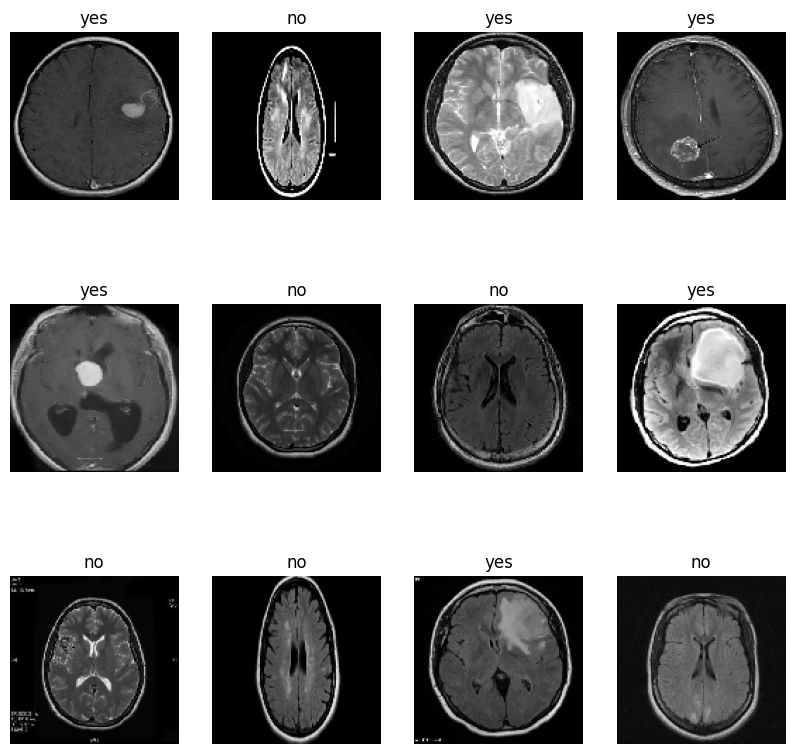

In [12]:
# print data set
plt.figure(figsize=(10,10))

for image, label in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)

    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_name[int(label[i])])
    plt.axis("off")



In [47]:
# shape of training data set and validation data set
print("Shape train_data set: ")
for img_batch, label_batch in train_data:
  print(img_batch.shape)
  print(label_batch.shape)
  break

print("Shape validation_data set: ")
for img_batch, label_batch in validation_data:
  print(img_batch.shape)
  print(label_batch.shape)
  break

print("Shape of data of training data set:")
for img_batch, label_batch in validation_data:
  print(img_batch[0].shape)
  print(label_batch[0].shape)
  break

print("Shape validation_data set: ")

for img_batch, label_batch in validation_data:
  print(img_batch.shape)
  print(label_batch.shape)
  break

Shape train_data set: 
(32, 120, 120, 3)
(32, 1)
Shape validation_data set: 
(32, 120, 120, 3)
(32, 1)
Shape of data of training data set:
(120, 120, 3)
(1,)
Shape validation_data set: 
(32, 120, 120, 3)
(32, 1)


### Preprocessing


In [14]:
# rescale = tf.keras.
normalization_layer = tf.keras.layers.Rescaling(1./255)

## ANN

In [57]:
# ANN model
# model architecture for binary classification

ann = keras.models.Sequential(
    [
      tf.keras.layers.Flatten(input_shape=(120,120,3)),
      tf.keras.layers.Dense(150, activation="relu"),
      # tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid"),
    ])

In [58]:

# compile the model
ann.compile(optimizer="adam",
            loss = "binary_crossentropy",
            metrics=["accuracy"])

In [59]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 43200)             0         
                                                                 
 dense_10 (Dense)            (None, 150)               6480150   
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 6,480,301
Trainable params: 6,480,301
Non-trainable params: 0
_________________________________________________________________


In [60]:
# fit model

ann_history = ann.fit(train_data, validation_data = validation_data, batch_size = batch_size, epochs = 20)

Epoch 1/20
7/7 [==============================] - 2s 44ms/step - loss: 1510.7458 - accuracy: 0.5123 - val_loss: 332.8298 - val_accuracy: 0.5400
Epoch 2/20
7/7 [==============================] - 1s 30ms/step - loss: 395.4256 - accuracy: 0.7340 - val_loss: 472.0083 - val_accuracy: 0.6600
Epoch 3/20
7/7 [==============================] - 1s 29ms/step - loss: 377.3837 - accuracy: 0.6847 - val_loss: 178.6284 - val_accuracy: 0.7600
Epoch 4/20
7/7 [==============================] - 1s 25ms/step - loss: 191.6624 - accuracy: 0.7635 - val_loss: 243.7729 - val_accuracy: 0.6200
Epoch 5/20
7/7 [==============================] - 1s 25ms/step - loss: 70.4850 - accuracy: 0.8227 - val_loss: 193.9693 - val_accuracy: 0.6000
Epoch 6/20
7/7 [==============================] - 1s 58ms/step - loss: 42.7782 - accuracy: 0.8079 - val_loss: 266.7445 - val_accuracy: 0.6400
Epoch 7/20
7/7 [==============================] - 1s 58ms/step - loss: 27.1071 - accuracy: 0.8424 - val_loss: 208.2506 - val_accuracy: 0.6200
E

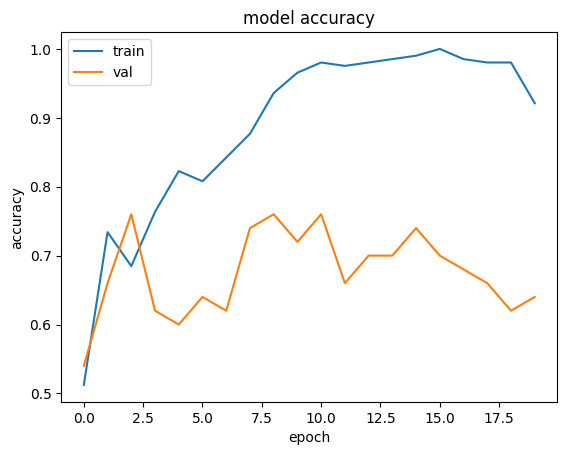

In [61]:
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

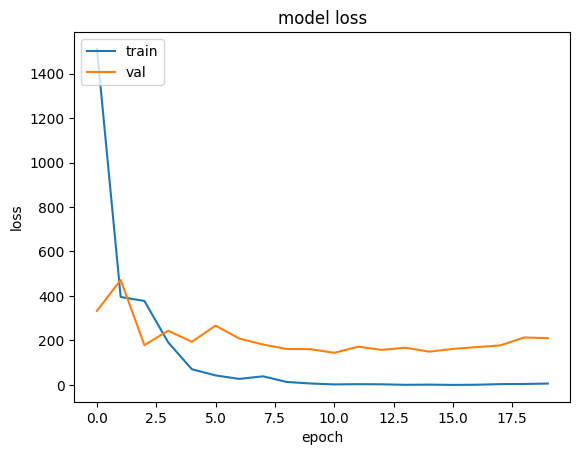

In [62]:
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()